<h1 align="center">EXTRACTING DATA FROM AN ID CARD</h1> 

____________________________

### Introduction

The purpose of this project is to take in an image of an ID card and extract the **Name**, **Surname**, **Nationality**, **ID Number** and **Date of Birth** from the ID Card. The result is a dataframe with all the extracted data.

### Step 1: Import Packages

Import packages such as numpy and pandas for the data manipulations, pytesseract for text extraction, and re for regex.

In [1]:
# Import all packages we will use in this project
import pandas as pd
import numpy as np
from PIL import Image
import re
import pytesseract

### Step 2: Import ID

Get an image of an ID Card & read it in.

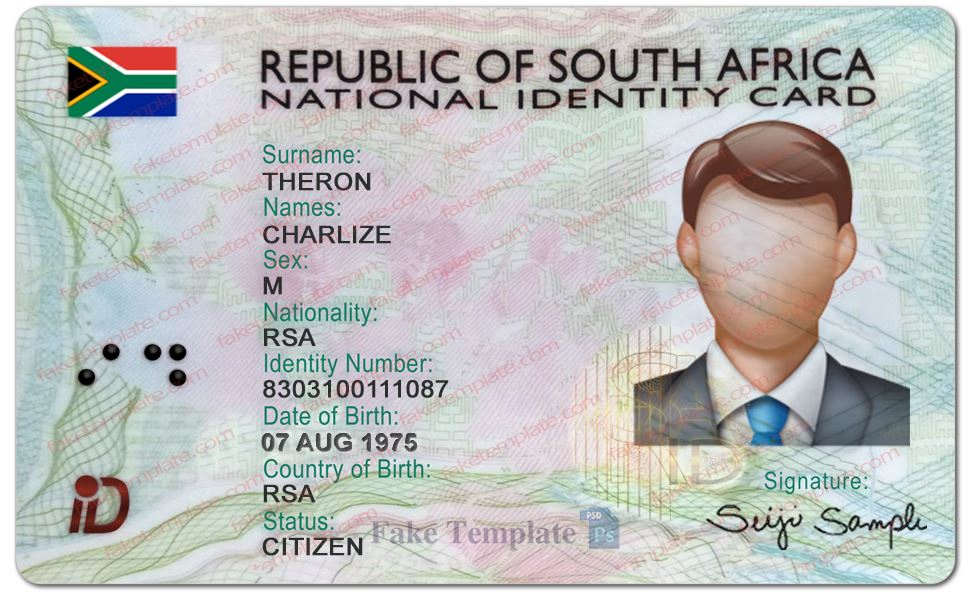

In [2]:
ID = Image.open("ID.jpg");
ID

### Step 3: Extract Data From Image To Text

Use pytesseract to extract all the text that is on the image of the ID Card

In [3]:
# Simply extracting text from image
text = pytesseract.image_to_string(ID)

### Step 4: Create Lists To Store Extracted Values

Create 2 lists. One that has the **Keys** and another that will hold the **Values** we will extract. The keys are the names of the values we are looking.

In [4]:
Keys = ['Name', 'Surname', 'Nationality', 'IDNumber', 'DOB']
Values = []

### Step 5: Pull The Corresponding Values For The Defined Keys

Use regex (regular expressions) to extract the values after the pre defined phrases. For example we only want to extract the name of the ID holder after the word 'Names'.

In [5]:
Values.append(re.findall(r"[\n\r].*Names:\s*([^\n\r]*)",text))
Values.append(re.findall(r"[\n\r].*Surname:\s*([^\n\r]*)",text))
Values.append(re.findall(r"[\n\r].*Nationality:\s*([^\n\r]*)",text))
Values.append(re.findall(r"[\n\r].*Identity Number:\s*([^\n\r]*)",text))
Values.append(re.findall(r"[\n\r].*Date of Birth:\s*([^\n\r]*)",text))

### Step 6: Create Dictionary From The Lists

Combine the two lists into one dictionary. The **Keys** list will be the key of the dictionary and the **Values** list will be the value of the dictionary.

In [6]:
ID_Dict = dict(zip(Keys, Values))

### Step 7: Convert Dictionary To DataFrame

Convert the dictionary into a dataframe. The **Keys** will become the column header and the **Values** will become the rows.

In [7]:
df = pd.DataFrame.from_dict(ID_Dict)
df

,Name,Surname,Nationality,IDNumber,DOB
0,CHARLIZE,THERON,SA,8303100111087,07 AUG 1975


________________________________________